In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("C:\project 4\RTA Dataset.csv")
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
# Replace 'na' text with real missing values
df = df.replace("na", np.nan)

# Remove rows missing key variables
df = df.dropna(subset=[
    "Time",
    "Weather_conditions",
    "Road_surface_conditions",
    "Area_accident_occured"
])

df.shape


(12077, 32)

In [5]:
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce")
df["Hour"] = df["Time"].dt.hour

def get_time_period(h):
    if 5 <= h < 12:
        return "Morning"
    elif 12 <= h < 17:
        return "Afternoon"
    elif 17 <= h < 21:
        return "Evening"
    else:
        return "Night"

df["Time_of_day"] = df["Hour"].apply(get_time_period)
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Time_of_day
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,Evening
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,Evening
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,Evening
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,Night
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,Night


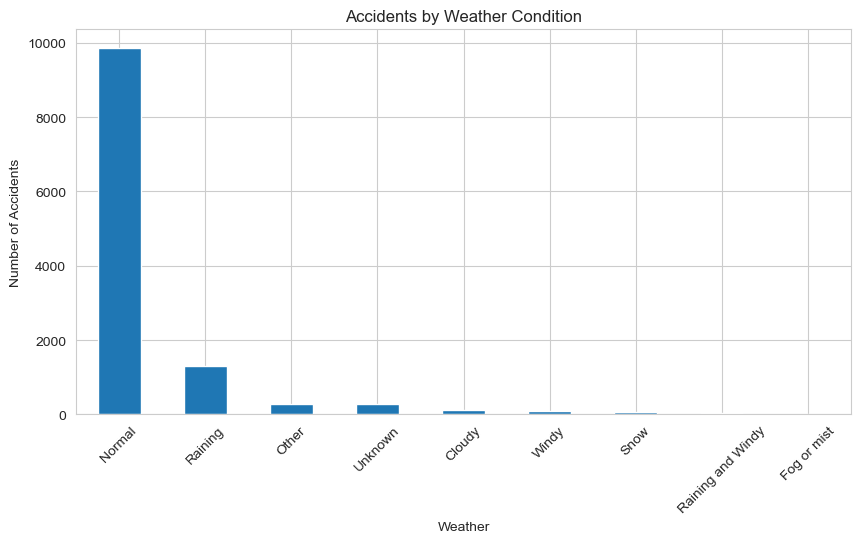

In [6]:
plt.figure(figsize=(10,5))
df["Weather_conditions"].value_counts().plot(kind="bar")
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


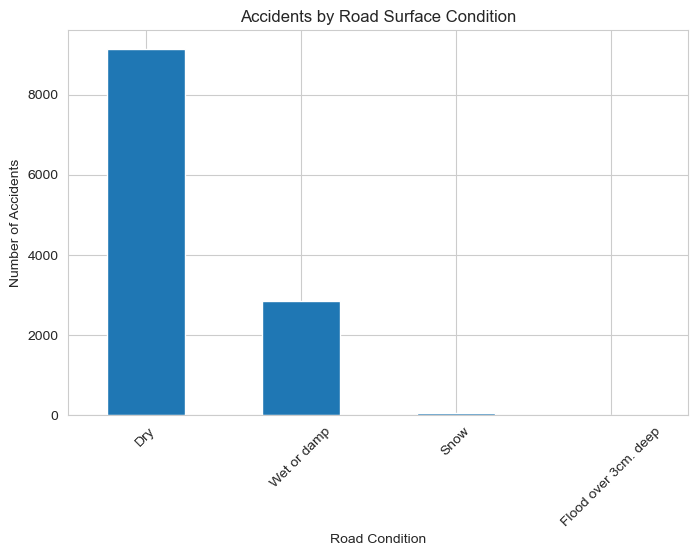

In [7]:
plt.figure(figsize=(8,5))
df["Road_surface_conditions"].value_counts().plot(kind="bar")
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Road Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


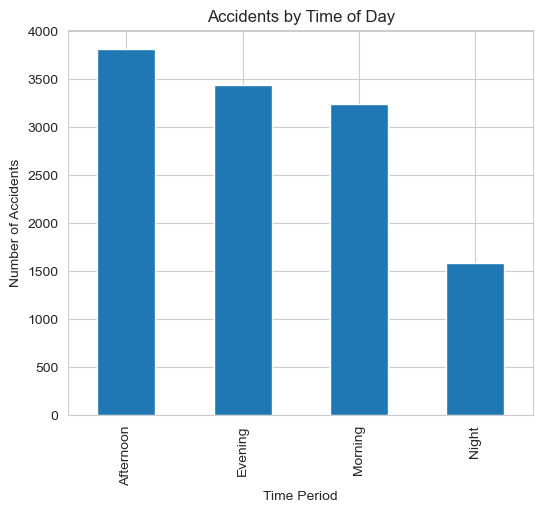

In [8]:
plt.figure(figsize=(6,5))
df["Time_of_day"].value_counts().plot(kind="bar")
plt.title("Accidents by Time of Day")
plt.xlabel("Time Period")
plt.ylabel("Number of Accidents")
plt.show()


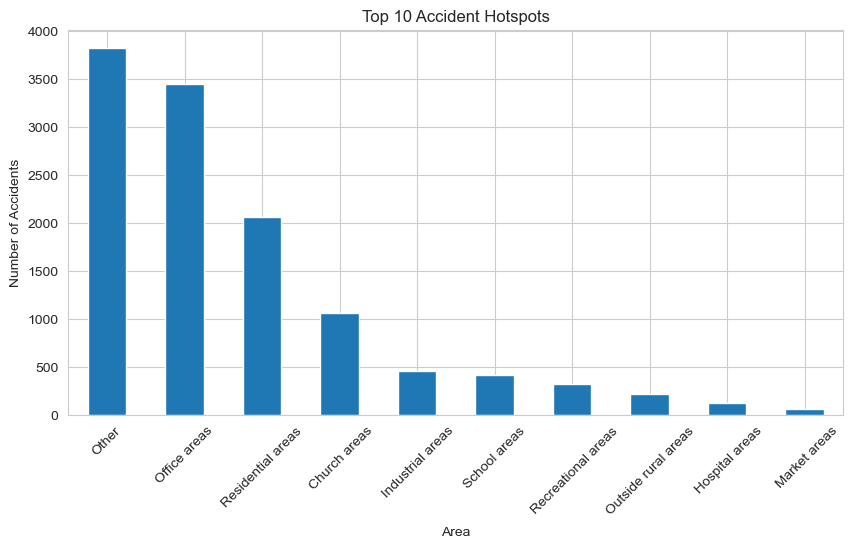

In [9]:
plt.figure(figsize=(10,5))
df["Area_accident_occured"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Accident Hotspots")
plt.xlabel("Area")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


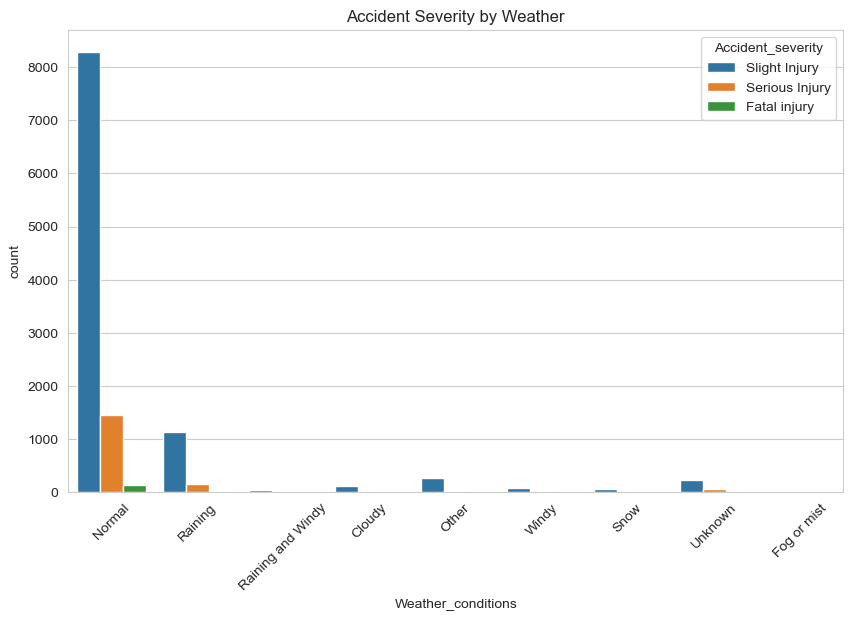

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Weather_conditions", hue="Accident_severity")
plt.title("Accident Severity by Weather")
plt.xticks(rotation=45)
plt.show()


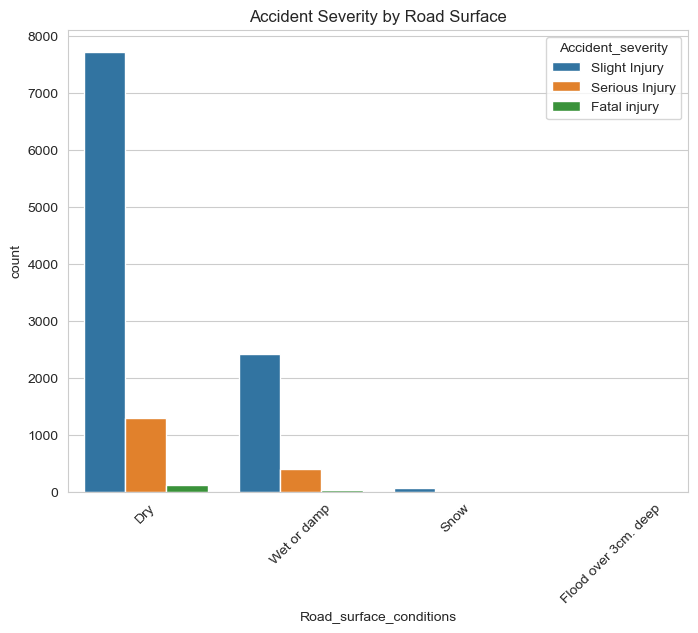

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Road_surface_conditions", hue="Accident_severity")
plt.title("Accident Severity by Road Surface")
plt.xticks(rotation=45)
plt.show()


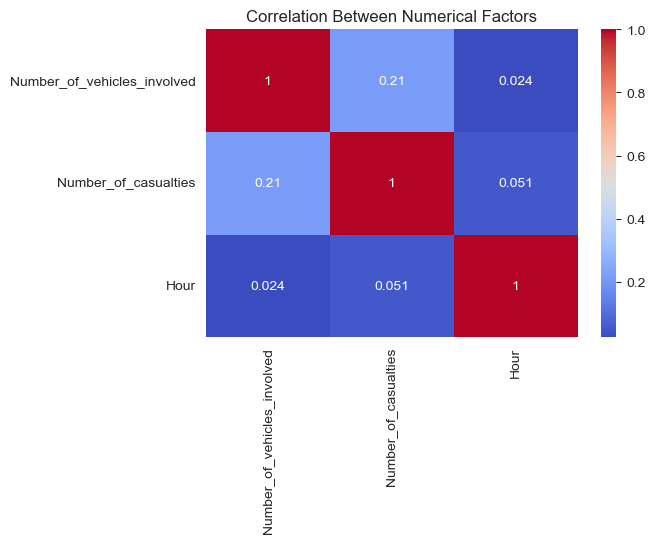

In [12]:
# Numerical relationships
num_cols = [
    "Number_of_vehicles_involved",
    "Number_of_casualties",
    "Hour"
]

plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Factors")
plt.show()


In [13]:
print("Most common weather condition:")
print(df["Weather_conditions"].mode()[0])

print("\nMost common road condition:")
print(df["Road_surface_conditions"].mode()[0])

print("\nPeak accident time:")
print(df["Time_of_day"].mode()[0])

print("\nTop accident area:")
print(df["Area_accident_occured"].mode()[0])


Most common weather condition:
Normal

Most common road condition:
Dry

Peak accident time:
Afternoon

Top accident area:
Other
